# Supervised Learning Capstone #
## Black Friday - Predicting How Much a Person Spends ##

#### Overview ####
This is a simulated dataset of sample transactions made at a retail store on Black Friday. The dataset was found on Kaggle at the following link.
https://www.kaggle.com/mehdidag/black-friday

#### Hypothesis ####
I hypothesis that gender, marital status, and age will be the most important features to determine how much money a customer will spend on Black Friday. During my data exploration, as seen later, I noticed a major difference in the numbers of customers based on gender, marital status, and age, and so I believe that those more frequent of customers tend to spend more money than others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Jillian/Desktop/Thinkful Data Files/BlackFriday.csv')

### Data Exploration ###

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


As seen above there are 537,577 transactions in total.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


##### 5 categorical features: ######
Product ID<br>
Gender<br>
Age - dataset uses age ranges<br>
City Category<br>
Stay in Current City Years<br>

##### 6 continuous features: #####
User ID<br>
Occupation *<br>
Marital Status<br>
Product Category 1 *<br>
Product Category 2 *<br>
Product Category 3 *<br>
*Dataset already has associated numbers for each.

Most of these features will need to be changed to numerical. The outcome variable is Purchase which is a continuous variable. This will need to be predicted by regression models.

In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

Something to note is there are not as many unique User IDs as there are transactions so there may be some reoccurring customers.

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

There are quite a few null values in Product Category 2 and 3. It seems those with null values in those features are customers who only bought one item from Product Category 1. I will try removing the null values and try filling them in.

In [7]:
df['Product_Category_2'].fillna('Unknown',inplace=True)
df['Product_Category_3'].fillna('Unknown',inplace=True)
#df = df.dropna()

Dropping the null values caused the models to have very low accuracy due to losing half of the dataset. In the end, I decided to fill in the null values with "Unknown."

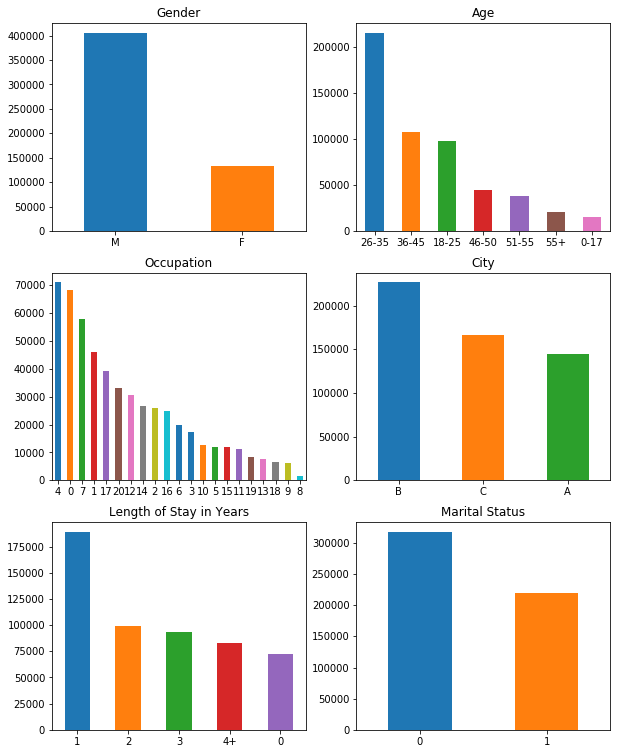

In [8]:
plt.figure(figsize=(10,13))

plt.subplot(3,2,1)
ax = df['Gender'].value_counts().plot(kind='bar',rot=0,title='Gender')

plt.subplot(3,2,2)
ax = df['Age'].value_counts().plot(kind='bar',rot=0,title='Age')

plt.subplot(3,2,3)
ax = df['Occupation'].value_counts().plot(kind='bar',rot=0,title='Occupation')

plt.subplot(3,2,4)
ax = df['City_Category'].value_counts().plot(kind='bar',rot=0,title='City')

plt.subplot(3,2,5)
ax = df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',rot=0,title='Length of Stay in Years')

plt.subplot(3,2,6)
ax = df['Marital_Status'].value_counts().plot(kind='bar',rot=0,title='Marital Status')

There are far more male customers than female customers. It also appears that most customers are younger in the 26-35 age range. Most customers have lived in their respective city for only 1 year. Also most customers are single rather than married.

In [9]:
all_married = df[df['Marital_Status'] == 1]
all_single = df[df['Marital_Status'] == 0]

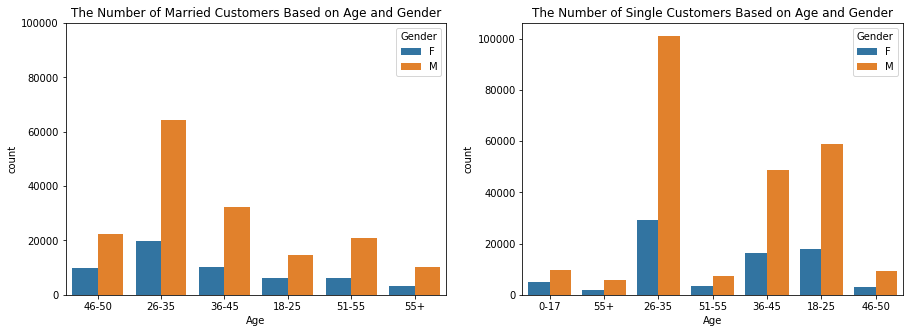

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(all_married['Age'],hue=all_married['Gender'],
              hue_order=['F','M']).set_title('The Number of Married Customers Based on Age and Gender')
plt.ylim(0,100000)

plt.subplot(1,2,2)
sns.countplot(all_single['Age'],hue=all_single['Gender'],
              hue_order=['F','M']).set_title('The Number of Single Customers Based on Age and Gender');

Most customers are single males between the ages of 26-35 with married males between the ages of 26-35 as second most. The least number of customers appear to be single females over the age of 55.

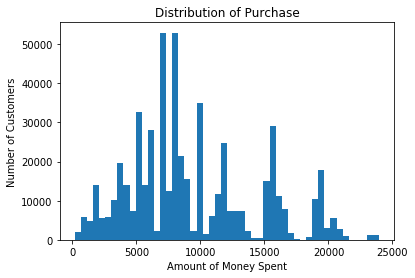

In [11]:
plt.hist(df['Purchase'], bins=50)
plt.title('Distribution of Purchase')
plt.xlabel('Amount of Money Spent')
plt.ylabel('Number of Customers');

Above is the distribution of purchase amounts. There do not appear to be any significant outliers. However the distribution is quite skewed to the right. Most purchases appear to be in the \\$5000 to \\$10000 range.

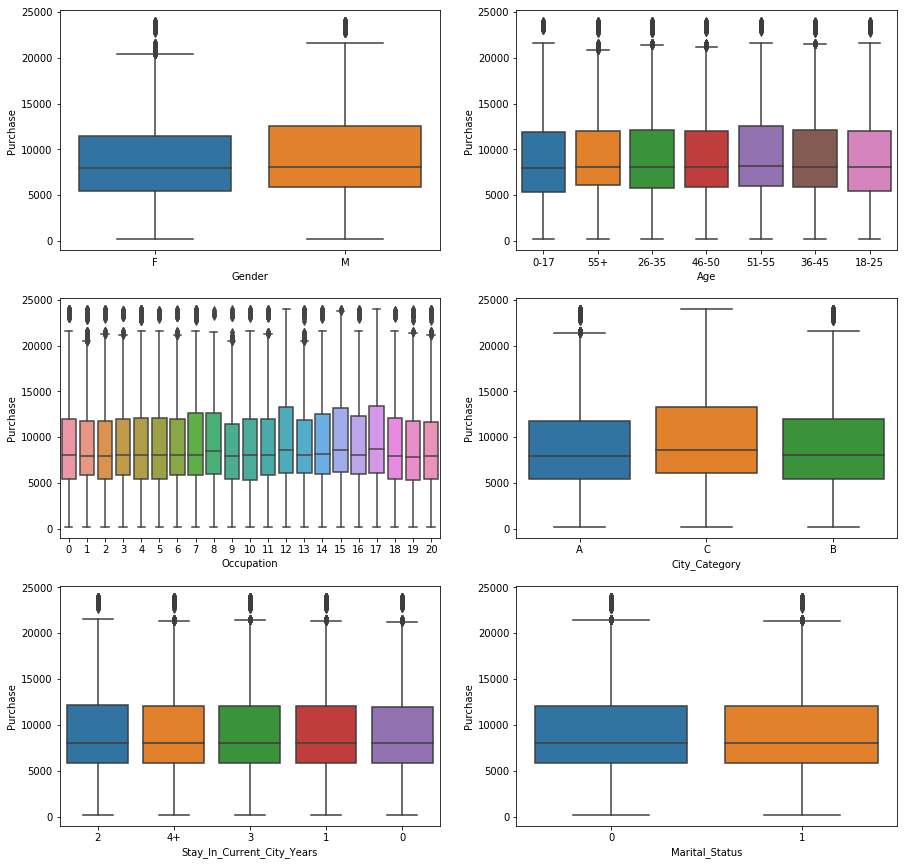

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

plt.subplot(3,2,2)
sns.boxplot(x = 'Age', y = 'Purchase', data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df)

plt.subplot(3,2,4)
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df)

plt.subplot(3,2,6)
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df);

The distribution of purchases among the above features appear to be very similar. It does not seem like there are any particular factors that cause a person to spend more money in terms of gender, marital status, age, etc.

In [13]:
all_females = df[df['Gender'] == 'F']
all_males = df[df['Gender'] == 'M']

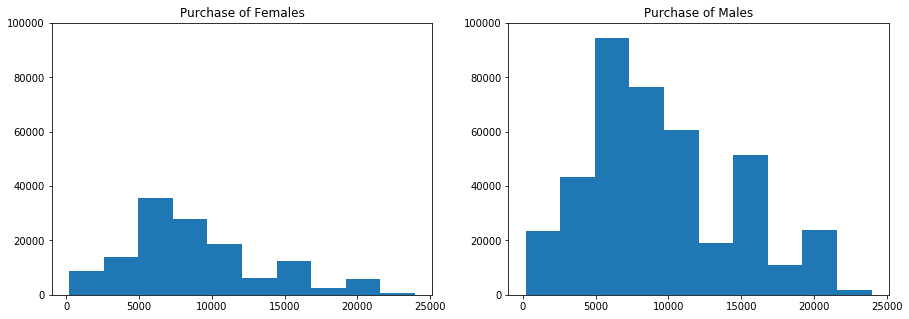

The mean purchase of females: $8809.76
The mean purchase of males: $9504.77
Purchase based on Gender T-test: Ttest_indResult(statistic=-45.67264701908008, pvalue=0.0)


In [14]:
from scipy.stats import ttest_ind
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_females['Purchase'])
plt.title('Purchase of Females')
plt.ylim(0,100000)

plt.subplot(1,2,2)
plt.hist(all_males['Purchase'])
plt.title('Purchase of Males')
plt.ylim(0,100000)
plt.show()

print("The mean purchase of females: ${0:.2f}".format(np.mean(all_females['Purchase'])))
print("The mean purchase of males: ${0:.2f}".format(np.mean(all_males['Purchase'])))
print("Purchase based on Gender T-test:", ttest_ind(all_females['Purchase'], all_males['Purchase'], equal_var=False))

There is a significant difference between the amount of money spent by male customers versus female customers with a p-value of 0.

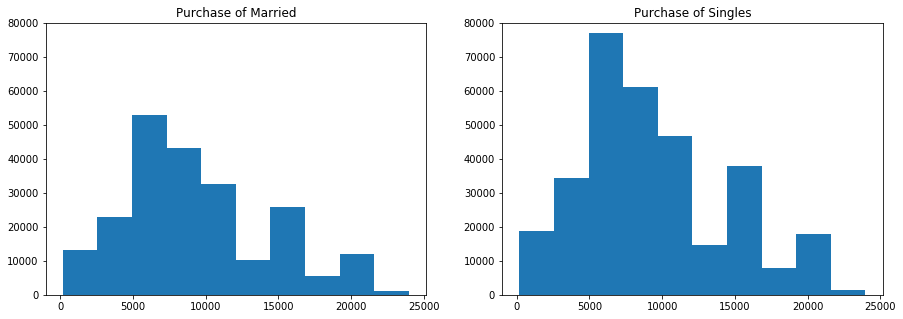

The mean purchase of married: $9334.63
The mean purchase of singles: $9333.33
Purchase based on Marital Status T-test: Ttest_indResult(statistic=0.09463132715737395, pvalue=0.9246077060850849)


In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_married['Purchase'])
plt.title('Purchase of Married')
plt.ylim(0,80000)

plt.subplot(1,2,2)
plt.hist(all_single['Purchase'])
plt.title('Purchase of Singles')
plt.ylim(0,80000)
plt.show()

print("The mean purchase of married: ${0:.2f}".format(np.mean(all_married['Purchase'])))
print("The mean purchase of singles: ${0:.2f}".format(np.mean(all_single['Purchase'])))
print("Purchase based on Marital Status T-test:", ttest_ind(all_married['Purchase'], all_single['Purchase'], equal_var=False))

There does not appear to be a significant difference betweeen the amount of money spent by married customers versus single customers.

### Feature Engineering ###

In [16]:
df['Stay_In_Current_City_Years'].replace({'4+':'4'}, inplace=True)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Purchase'] = np.log(df['Purchase'])

Above I am adjusting the Stay in Current City Years feature so it can be used as a numerical feature. I am also changing the Purchase outcome to a log-transformed variable so it will be normally distributed.

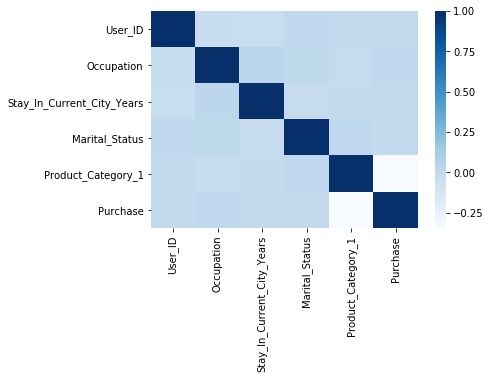

In [17]:
sns.heatmap(df.corr(),cmap='Blues');

The heatmap shows that the data suffers from very little to no negative or positive multicollinearity.

In [18]:
df = pd.get_dummies(df, columns=['Gender','City_Category','Age',
                                 'Occupation','Product_Category_1',
                                 'Product_Category_2','Product_Category_3'])

df = df.drop(columns=['Product_ID','User_ID'])

I have changed the categorical features to numerical features and have dropped the Product ID and User ID features.

# Model Selection #

In [19]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [20]:
X = df.drop(columns=['Purchase'])
y = df.Purchase

I am setting all of the features to X and the Purchase outcome to y.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

Next I am splitting the training and test sets to 67% and 33% respectively.

### Lasso Regression ###

In [26]:
start_time = time.time()

lasso = linear_model.Lasso(alpha=.0001)
lasso.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 29.663336992263794 seconds ---


In [27]:
start_time = time.time()

scores = pd.DataFrame(data={'Lasso Regression': [lasso.score(X_train, y_train), lasso.score(X_test, y_test)]})

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6597290654110618
0.6603339569929496
--- 1.261932611465454 seconds ---


The first model I tried was lasso regression. Due to the dataset having a rather large number of features, I used lasso regression to remove the least important ones. I will be able to use the coefficients below to help decipher what are the most important and impactful features in predicting how much money a person will spend.

The computational run time was pretty quick. The accuracy scores for the training and test sets were decent but I will attempt to increase the score with feature selection later on.

In [30]:
fieldList = np.array(list(X)).reshape(-1,1)
coeffs = np.reshape(np.round(lasso.coef_,5),(-1,1))
coeffs = np.concatenate((fieldList,coeffs),axis=1)
coeffs = pd.DataFrame(coeffs,columns=['Field','Coeff'])
coeffs['Coeff'] = coeffs['Coeff'].astype(float)
print(coeffs[coeffs['Coeff']>0.1])
print('\n')
print(coeffs[coeffs['Coeff']<-0.1])

                      Field    Coeff
35     Product_Category_1_1  0.14652
40     Product_Category_1_6  0.29083
41     Product_Category_1_7  0.36371
43     Product_Category_1_9  0.16172
44    Product_Category_1_10  0.55248
49    Product_Category_1_15  0.20164
50    Product_Category_1_16  0.25478
61  Product_Category_2_10.0  0.10884
75   Product_Category_3_8.0  0.15412


                     Field    Coeff
38    Product_Category_1_4 -1.59157
39    Product_Category_1_5 -0.61901
42    Product_Category_1_8 -0.41883
45   Product_Category_1_11 -0.92644
46   Product_Category_1_12 -2.11847
47   Product_Category_1_13 -2.75232
52   Product_Category_1_18 -1.31265
55  Product_Category_2_4.0 -0.17264
72  Product_Category_3_4.0 -0.29677


The features with the most significant positive and negative coefficients all appear to relate to the product category. The other features (gender, age, marital status, etc.) do not appear to be as impactful. This actually makes sense as certain product categories are going to be more expensive than others.

### Decision Tree ###

In [31]:
from sklearn import tree

start_time = time.time()

decision_tree = tree.DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.4891350269317627 seconds ---


In [32]:
start_time = time.time()

scores['Decision Tree'] = [decision_tree.score(X_train, y_train), decision_tree.score(X_test, y_test)]

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6779834703229066
0.6587157019251342
--- 1.1154847145080566 seconds ---


The next model I tried was decision tree. Similarly to the lasso regression, I will use the feature importance attribute to see which features are most impactful to predicting how much money a person will spend.

The computational run time was quick and the accuracy scores were decent but could probably be better.

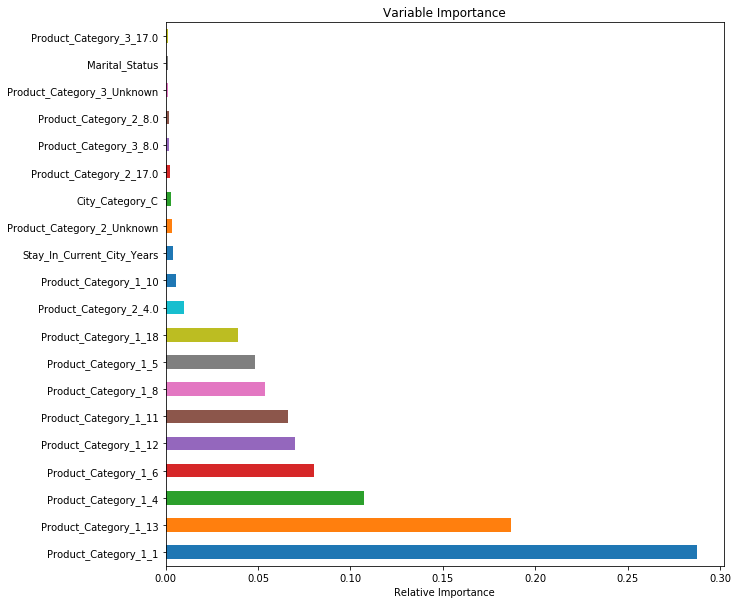

In [33]:
plt.figure(figsize=(10,10))
feature_importance = pd.Series(decision_tree.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The decision tree is using mostly the Product Category for predicting purchase amount. There are some slight differences from lasso regression in that Stay in Current City Years, City Category, and Marital Status are also being used in the top 20.

### Random Forest ###

In [34]:
from sklearn import ensemble

start_time = time.time()

rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 34.456010818481445 seconds ---


In [35]:
start_time = time.time()

scores['Random Forest'] = [rfr.score(X_train, y_train), rfr.score(X_test, y_test)]

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.7806281883699642
0.6416083194240211
--- 5.5153748989105225 seconds ---


The next model I tried was the random forest model. The computational run time was rather quick. The accuracy score for the training set has done the best of the models so far. However there is quite a difference between the accuracy score for the training set and the test set so there maybe some overfitting.

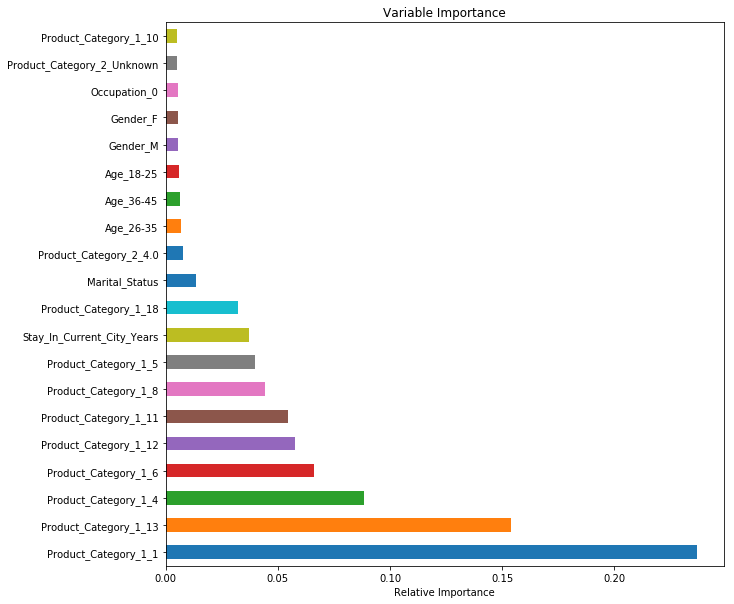

In [36]:
plt.figure(figsize=(10,10))
feature_importance = pd.Series(rfr.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Random forest is pretty consistent with lasso regression and decision tree in that Product Category is one of the most important features. However interestingly random forest is using some of the other features like age, gender, and marital status. These features are still not as important as Product Category but they are more impactful than in the other models.

### Gradient Boosting ###

In [37]:
start_time = time.time()

params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 202.07163548469543 seconds ---


In [38]:
start_time = time.time()

scores['Gradient Boosting'] = [reg.score(X_train, y_train), reg.score(X_test, y_test)]

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6639160047659454
0.6640292298852232
--- 13.51868724822998 seconds ---


The final model I tried was gradient boosting. The computational run time took the longest. However the accuracy score for the training and test sets were the most consistent. Although similarly to the other models the accuracy scores could be better.

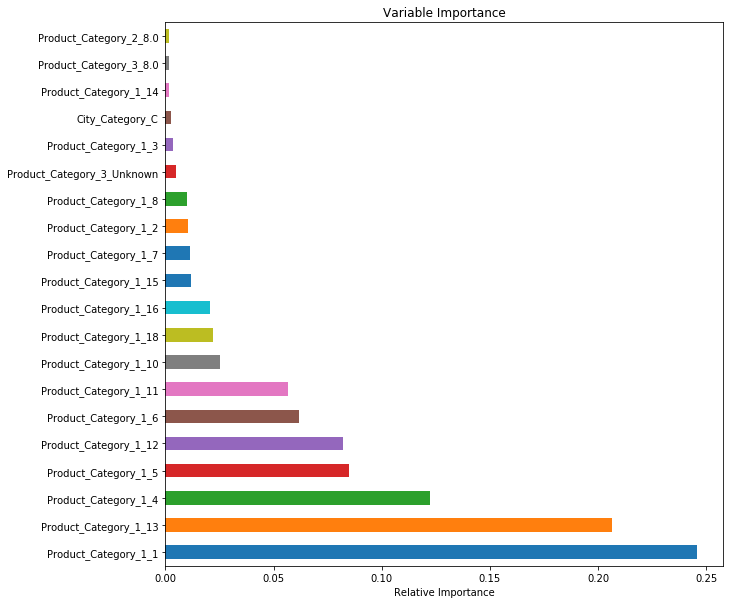

In [39]:
plt.figure(figsize=(10,10))
feature_importance = pd.Series(reg.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Once again, the gradient boosting model mostly used Product Category as one of the most important features. For the decision tree, random forest, and gradient boosting models, Product Category 1 of type 1 was the number one most important feature but with different levels of relative importance.

### Feature Selection: Principal Component Analysis (PCA) ###

As the previous model accuracy scores were decent but not great I decided to attempt the models again after doing feature selection. As seen below, I first attempted with Principal Component Analysis and then with Select K Best.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)

When I attempted the models with PCA, I had scaled the dataset prior. However due to the majority of features being categorical it did not make much sense to scale all of them and it did not help with the accuracy scores.

In [41]:
# PCA to keep 80% of variance
pca = PCA(0.8)

# Components required to keep 80% of variance
X_pca = pca.fit_transform(X)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 80% of the variance.'.format(len(var_cumsum)))

[0.24575943 0.31703391 0.3720166  0.42652475 0.47549752 0.51880931
 0.55735779 0.59392602 0.62492455 0.65094604 0.6720801  0.69004709
 0.70758498 0.72401178 0.73984791 0.75421456 0.76735429 0.77892912
 0.79022634 0.80014506]


Need to keep 20 components to explain 80% of the variance.


I had played around with the amount of explained variance. I decided to start with 80% which would require 20 out of the 88 components. The accuracy scores as seen later on were poorer with lesser percentage of explained variance and would increase with a higher percentage of explained variance. Which in conclusion means the PCA is not helping much.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=111)

### Lasso Regression with PCA ###

In [43]:
lasso = linear_model.Lasso(alpha=.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
scores_PCA = pd.DataFrame(data={'Lasso Regression': [lasso.score(X_train, y_train)]})

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.21427458788375353
0.21293987648369572


The accuracy scores above are much worse than the accuracy scores without PCA.

### Decision Tree with PCA ###

In [45]:
decision_tree = tree.DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
scores_PCA['Decision Tree'] = [decision_tree.score(X_train, y_train)]

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

0.55673701686954
0.4840873860767805


The accuracy scores above are slightly worse than the accuracy scores without PCA but are not failing as bad as the lasso regression scores.

### Random Forest with PCA ###

In [47]:
rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
scores_PCA['Random Forest'] = [rfr.score(X_train, y_train)]

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.7713372419197189
0.591433603087121


The training set score was pretty consistent with the model without PCA however there is an even larger difference between the training set score and test score so possibly some overfitting.

### Gradient Boosting with PCA ###

In [49]:
params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
scores_PCA['Gradient Boosting'] = [reg.score(X_train, y_train)]

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.3816479166301945
0.37437825996242435


Once again, the accuracy scores were poorer with PCA than without.

### Feature Selection: Select K Best (SKB) ###
As the PCA did not seem to increase the accuracy of the scores and due to the nature of the dataset (number of categorical features), I attempted the models with SKB to see if using only the most important features would help.

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=15)
selector.fit(X, y)

X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()

(537577, 15)


['Product_Category_1_1',
 'Product_Category_1_2',
 'Product_Category_1_3',
 'Product_Category_1_4',
 'Product_Category_1_5',
 'Product_Category_1_6',
 'Product_Category_1_8',
 'Product_Category_1_9',
 'Product_Category_1_10',
 'Product_Category_1_11',
 'Product_Category_1_12',
 'Product_Category_1_13',
 'Product_Category_1_14',
 'Product_Category_1_15',
 'Product_Category_2_4.0']

As a note, SKB is consistent with the previous models in determining Product Category as being the most important feature for predicting purchase amount.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_skbest, y, test_size=0.33, random_state=111)

### Lasso Regression with SKB ###

In [53]:
lasso = linear_model.Lasso(alpha=.000001)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
scores_SKB = pd.DataFrame(data={'Lasso Regression': [lasso.score(X_train, y_train)]})

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6213459715839016
0.6240121716623556


Lasso regression with SKB is doing much better than with PCA but not better than without PCA or SKB.

### Decision Tree with SKB ###

In [55]:
decision_tree = tree.DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
scores_SKB['Decision Tree'] = [decision_tree.score(X_train, y_train)]

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

0.6218284397207232
0.6244940077632458


Decision tree with SKB scores are better than PCA but not without PCA or SKB.

### Random Forest with SKB ###

In [57]:
rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
scores_SKB['Random Forest'] = [rfr.score(X_train, y_train)]

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.6218263697231741
0.6244900996345033


Random forest with SKB was better than the other models with PCA and without PCA or SKB in that there appears to be no overfitting.

### Gradient Boosting with SKB ###

In [59]:
params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
scores_SKB['Gradient Boosting'] = [reg.score(X_train, y_train)]

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.6208498917895076
0.6231522687228277


Gradient boosting with SKB had a faster computational run time than the other models with PCA and without PCA or SKB, but similarly to the other SKB models the accuracy scores were not better than the models without SKB.

### Analysis ###

In [63]:
print(scores)
print("\n")
print(scores_PCA)
print("\n")
print(scores_SKB)

   Lasso Regression  Decision Tree  Random Forest  Gradient Boosting
0          0.659729       0.677983       0.780628           0.663916
1          0.660334       0.658716       0.641608           0.664029


   Lasso Regression  Decision Tree  Random Forest  Gradient Boosting
0          0.214275       0.556737       0.771337           0.381648


   Lasso Regression  Decision Tree  Random Forest  Gradient Boosting
0          0.621346       0.621828       0.621826            0.62085


In [138]:
train = scores.values[0]
test = scores.values[1]

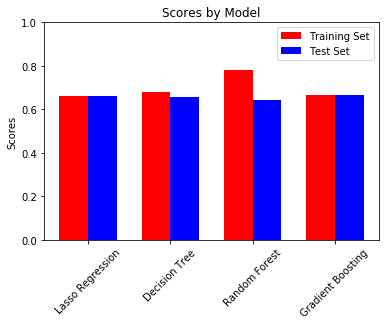

In [109]:
ind = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, train, width, color='r')
rects2 = ax.bar(ind + width, test, width, color='b')

ax.set_ylabel('Scores')
ax.set_title('Scores by Model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((scores.columns),rotation=45)
ax.set_ylim(0,1)

ax.legend((rects1[0], rects2[0]), ('Training Set', 'Test Set'))
plt.show()

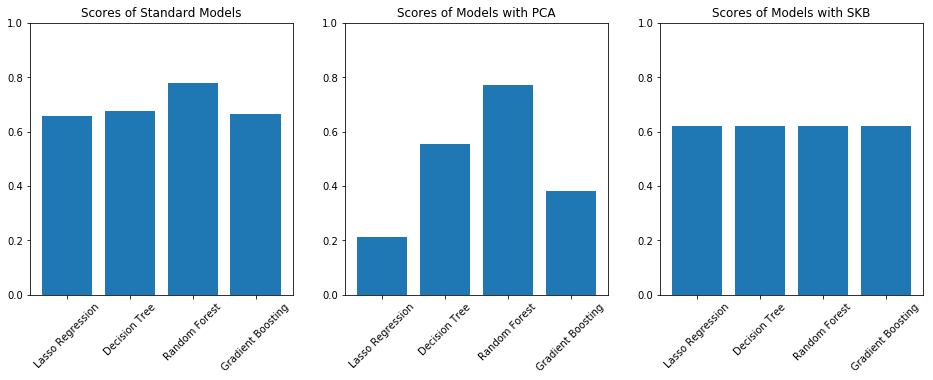

In [150]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.bar(scores.columns,train)
plt.xticks(rotation=45)
plt.title('Scores of Standard Models')
plt.ylim(0,1)

plt.subplot(1,3,2)
plt.bar(scores_PCA.columns,scores_PCA.values.flatten())
plt.xticks(rotation=45)
plt.title('Scores of Models with PCA')
plt.ylim(0,1)

plt.subplot(1,3,3)
plt.bar(scores_SKB.columns,scores_SKB.values.flatten())
plt.xticks(rotation=45)
plt.title('Scores of Models with SKB')
plt.ylim(0,1);

* The standard Random Forest model performed the best accuracy-wise, however potentially overfitting.
* The standard Gradient Boosting and Gradient Boosting with SKB models were the most consistent, however take a while to run.

### Conclusion ###

In conclusion, Product Category was the most important feature for predicting how much money is spent by a customer. This makes sense as certain products will be more expensive than others such as electronics or furniture. This conclusion was consistent across all models including SKB.